# Star Wars Survey Analysis

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey.

# Objective

The objective of this analysis is to clean the data and answer which of the Star Wars movies are the most popular and well liked among the respondents of the survey.

# Reading in the data

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\star_wars.csv', encoding='ISO-8859-1')
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Let's only keep rows where the respondent has seen atleast one star wars movie.

In [2]:
star_wars = star_wars[star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] == 'Yes']
star_wars.shape

(936, 38)

We got the total rows down from 1186 to 936.

# Including respondents who have watched all 6 movies

To answer the question which movie is the most liked by the viewers among the 6 movies, we should only consider the responses of viewers who have watched all the 6 movies to keep the analysis fair.

# Renaming seen columns

In [6]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':
                                     'seen_1', 'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4',
                                     'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'})

In [7]:
cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
mask = star_wars[cols].notnull().all(axis=1)
star_wars = star_wars[mask]
star_wars.shape

(471, 38)

We have 471 respondents who have watched all 6 movies in the star wars universe

# Renaming preference columns

In [10]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':
                                     'star_wars_1', 'Unnamed: 10': 'star_wars_2', 'Unnamed: 11': 'star_wars_3',
                                     'Unnamed: 12': 'star_wars_4', 'Unnamed: 13': 'star_wars_5', 'Unnamed: 14': 'star_wars_6'})

# Visualizing the prefrences of the viewers

For each star wars movie, the respondent gave a preference number from 1 to 6, with 1 being most preffered and 6 being the least preferred. We are going to do a value count of preferences of each movie and plotiing them on a bar graph. 

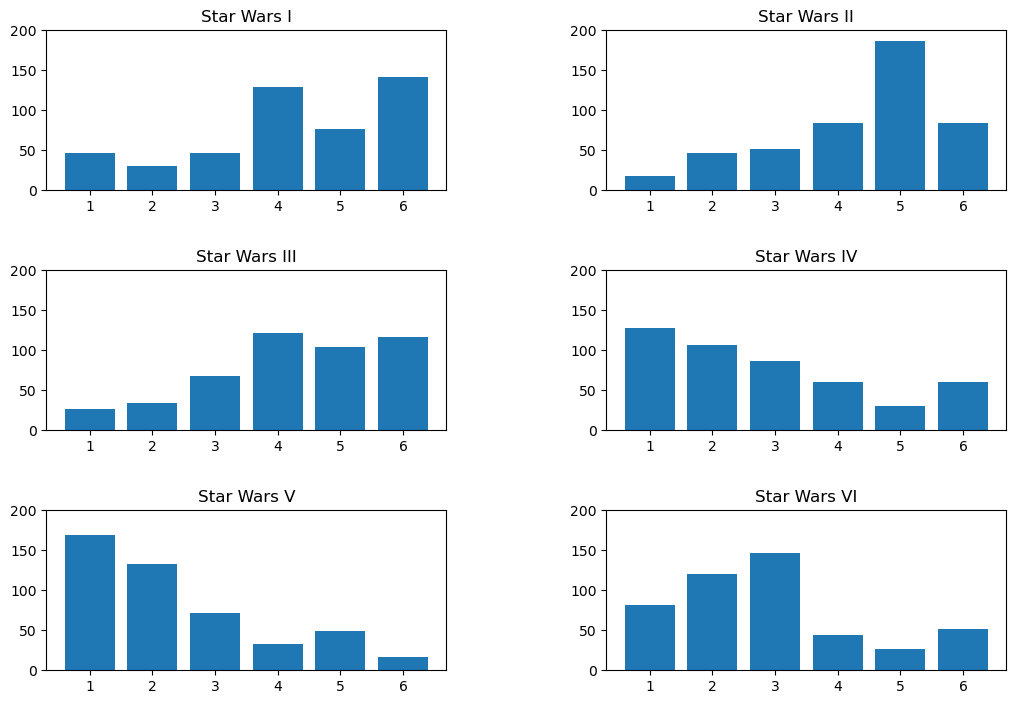

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Plot the value counts of each column on separate subplots
axs[0, 0].bar(star_wars['star_wars_1'].value_counts().index, star_wars['star_wars_1'].value_counts())
axs[0, 1].bar(star_wars['star_wars_2'].value_counts().index, star_wars['star_wars_2'].value_counts())
axs[1, 0].bar(star_wars['star_wars_3'].value_counts().index, star_wars['star_wars_3'].value_counts())
axs[1, 1].bar(star_wars['star_wars_4'].value_counts().index, star_wars['star_wars_4'].value_counts())
axs[2, 0].bar(star_wars['star_wars_5'].value_counts().index, star_wars['star_wars_5'].value_counts())
axs[2, 1].bar(star_wars['star_wars_6'].value_counts().index, star_wars['star_wars_6'].value_counts())

axs[0, 0].set_title('Star Wars I')
axs[0, 1].set_title('Star Wars II')
axs[2, 0].set_title('Star Wars V')
axs[1, 0].set_title('Star Wars III')
axs[1, 1].set_title('Star Wars IV')
axs[2, 1].set_title('Star Wars VI')

for ax in axs.flat:
    ax.set_ylim([0, 200])

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.5, wspace=0.4)

plt.show()

# Conclusion

A lot of interesting insights can be derived from the figure:

- Star wars I: The phantom menace is not very popular among fans with most choosing it as their 4th or 6th preferred movie.


- Star wars II: Attack of the clones is also not approved by the fans with it being ranked 5 by most viewers.


- Star wars III: Revenge of the sith is rated no better than the first episode.


- Star wars IV: A new hope is where people start appreciating the series with many nominating it as their 1st, 2nd or 3rd preferred movie in the franchise.


- Star wars V: The empire strikes back: Clearly the most admired movie with more than 150 respondents opting it as their pick.


- Star wars VI: Return of the jedi: While not as impresive as the fifth one, still holds better liking than the prequel.



Based on the data, it's clear that fans who have seen all six movies in the franchise tend to prefer the original trilogy over the prequel trilogy, with Star Wars V: The Empire Strikes Back being the most highly rated of all.